<a href="https://colab.research.google.com/github/vinayks8055/Parallel-Computing/blob/master/PC_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traditional Method

In [1]:
%%writefile input.txt
3 3 3
0.1 0.2

Writing input.txt


In [2]:
%%writefile mark1.cpp
#include<bits/stdc++.h>

#define fillZero(S, r, t)     for(int i=0;i<r;i++)  for(int j=i;j<t;j++){   S[i][j] = 0;    S[j][i] = 0;    }
#define shuffleIndex(ele, zA, nzA)      for (unsigned int i = 0; i < zA; ++i)   ele.push_back(0);   for (unsigned int i = 0; i < nzA; ++i)  ele.push_back(1); random_shuffle(ele.begin(), ele.end());
#define fillMatrix(ele,A,m,n)  it = ele.begin(); for(int i=0;i<m;i++){  for(int j=0;j<n;j++){ if(*it) A[i][j] = rand()%1000; it++;}}
#define printMatrix(A,m,n)    for( int i = 0; i < m; i++){   for( int j = 0; j < n; j++)  cout<<A[i][j]<<'\t';  cout<<'\n'; }


using namespace std;
using namespace std::chrono;



int main()
{
	ios_base::sync_with_stdio(false);
	cin.tie(0);cout.tie(0);
	freopen("input.txt", "r", stdin);
	auto start = high_resolution_clock::now();

  int m,n,p;
  double spA,spB;
	cin>>m>>n>>p>>spA>>spB;
 
  srand(time(0));
 
 // Calculating the number of zero and non zero elements in the Arrays A and B
  int tA = m*n;
  int nzA = ceil(spA*tA);
  int zA = tA - nzA;
  int tB = n*p;
  int nzB = ceil(spB*tB);
  int zB = tB - nzB;

//Generating the elements to fill up the matrix
  int  A[m][n],B[n][p];
 
  fillZero(A,m,n)
  fillZero(B,n,p)
 

  vector<int> ele;
  auto it = ele.begin();
 
  shuffleIndex(ele,zA,nzA)
  fillMatrix(ele,A,m,n)
  cout<<"A:\n";
  printMatrix(A,m,n)

  ele.clear();
  shuffleIndex(ele,zB,nzB)
  fillMatrix(ele,B,n,p)
  cout<<"\nB:\n";
  printMatrix(B,n,p)

//Multiplication
  int C[m][p];
  for (int i = 0; i < m; i++) {
      for (int j = 0; j < p; j++) {
          C[i][j] = 0;
          for (int k = 0; k < n; k++)
              C[i][j] += A[i][k] * B[k][j];
      }
  }
  cout<<"\nC:\n";
  printMatrix(C,m,p)

	auto stop = high_resolution_clock::now();

	auto duration = duration_cast<microseconds>(stop - start);

	cout << "Time taken by function: "
		<< duration.count() << " microseconds" << endl;
	return 0;
}

Writing mark1.cpp


In [7]:
!g++ mark1.cpp
!./a.out

A:
0	596	0	
0	0	0	
0	0	0	

B:
0	0	0	
0	0	192	
352	0	0	

C:
0	0	114432	
0	0	0	
0	0	0	
Time taken by function: 54 microseconds


## COO Format

In [10]:
%%writefile mark2.cpp
#include<bits/stdc++.h>

#define fillZero(S, r, t)     for(int i=0;i<r;i++)  for(int j=i;j<t;j++){   S[i][j] = 0;    S[j][i] = 0;    }
#define shuffleIndex(ele, zA, nzA)      for (unsigned int i = 0; i < zA; ++i)   ele.push_back(0);   for (unsigned int i = 0; i < nzA; ++i)  ele.push_back(1); random_shuffle(ele.begin(), ele.end());
#define fillMatrix(ele,row,column,value,m,n)  it = ele.begin(); for(int i=0;i<m;i++){  for(int j=0;j<n;j++){ if(*it)   row.push_back(i); column.push_back(j); value.push_back(rand()%1000); it++;}}
#define printMatrix(row,column,value,ptr,m,n)    for( int i = 0; i < m; i++){   for( int j = 0; j < n; j++) {  if(row[ptr]==i && column[ptr]==j){  cout<<value[ptr]<<" ";ptr++;}else  cout<<"0 ";    }  cout<<'\n'; }

using namespace std;
using namespace std::chrono;



int main()
{
	ios_base::sync_with_stdio(false);
	cin.tie(0);cout.tie(0);
	freopen("input.txt", "r", stdin);
	auto start = high_resolution_clock::now();

  int m,n,p,ptr;
  double spA,spB;
	cin>>m>>n>>p>>spA>>spB;
 
  srand(time(0));
 
 // Calculating the number of zero and non zero elements in the Arrays A and B
  int tA = m*n;
  int nzA = ceil(spA*tA);
  int zA = tA - nzA;
  int tB = n*p;
  int nzB = ceil(spB*tB);
  int zB = tB - nzB;

//Generating the elements to fill up the matrix
  vector<int> rowA,columnA,valueA;
  vector<int> rowB,columnB,valueB;
  vector<int> ele;
  auto it = ele.begin();
 
  shuffleIndex(ele,zA,nzA)
  fillMatrix(ele,rowA,columnA,valueA,m,n)
  cout<<"A:\n";
  ptr=0;
  printMatrix(rowA,columnA,valueA,ptr,m,n)

  ele.clear();
  shuffleIndex(ele,zB,nzB)
  fillMatrix(ele,rowB,columnB,valueB,n,p)
  cout<<"\nB:\n";
  ptr=0;
  printMatrix(rowB,columnB,valueB,ptr,n,p)

//Multiplication
  map<pair<int,int>,int> mp;
  map<pair<int,int>,int> :: iterator itr;
  for (int i = 0; i < columnA.size(); i++) {
      for (int j = 0; j < rowB.size(); j++) {
          if(columnA[i] == rowB[j]){
              mp[{rowA[i],columnB[j]}] += valueA[i] * valueB[j];
          }
      }
  }
  itr = mp.begin();
  cout<<"\nC:\n";
  for( int i = 0; i < m; i++){   
      for( int j = 0; j < n; j++) {  
          if(itr->first.first==i && itr->first.second==j){ 
               cout<<itr->second<<" ";itr++;}
          else  cout<<"0 ";    
          }  
      cout<<'\n';
  }
	auto stop = high_resolution_clock::now();

	auto duration = duration_cast<microseconds>(stop - start);

	cout << "Time taken by function: "
		<< duration.count() << " microseconds" << endl;
	return 0;
}

Overwriting mark2.cpp


In [16]:
!g++ mark2.cpp
!./a.out

A:
0 0 0 
0 0 0 
271 0 0 

B:
99 0 0 
0 688 0 
0 0 0 

C:
0 0 0 
0 0 0 
26829 0 0 
Time taken by function: 90 microseconds


## Graph between runtime of Traditional method and COO Format

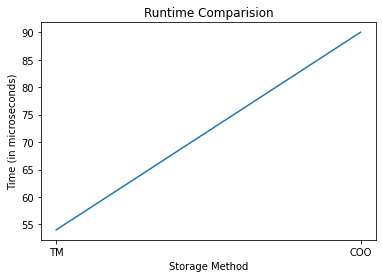

In [20]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = ["TM","COO"]
# corresponding y axis values
y = [54,90]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Storage Method')
# naming the y axis
plt.ylabel('Time (in microseconds)')

# giving a title to my graph
plt.title('Runtime Comparision')

# function to show the plot
plt.show()


## CSR Format

In [ ]:
%%writefile mark3.cpp
#include<bits/stdc++.h>

#define fillZero(S, r, t)     for(int i=0;i<r;i++)  for(int j=i;j<t;j++){   S[i][j] = 0;    S[j][i] = 0;    }
#define shuffleIndex(ele, zA, nzA)      for (unsigned int i = 0; i < zA; ++i)   ele.push_back(0);   for (unsigned int i = 0; i < nzA; ++i)  ele.push_back(1); random_shuffle(ele.begin(), ele.end());
#define fillMatrix(ele,row,column,value,m,n)  it = ele.begin(); for(int i=0;i<m;i++){  for(int j=0;j<n;j++){ if(*it)   row.push_back(i); column.push_back(j); value.push_back(rand()%1000); it++;}}
#define printMatrix(row,column,value,ptr,m,n)    for( int i = 0; i < m; i++){   for( int j = 0; j < n; j++) {  if(row[ptr]==i && column[ptr]==j){  cout<<value[ptr]<<" ";ptr++;}else  cout<<"0 ";    }  cout<<'\n'; }

using namespace std;
using namespace std::chrono;



int main()
{
	ios_base::sync_with_stdio(false);
	cin.tie(0);cout.tie(0);
	freopen("input.txt", "r", stdin);
	auto start = high_resolution_clock::now();

  int m,n,p,ptr;
  double spA,spB;
	cin>>m>>n>>p>>spA>>spB;
 
  srand(time(0));
 
 // Calculating the number of zero and non zero elements in the Arrays A and B
  int tA = m*n;
  int nzA = ceil(spA*tA);
  int zA = tA - nzA;
  int tB = n*p;
  int nzB = ceil(spB*tB);
  int zB = tB - nzB;

//Generating the elements to fill up the matrix


//Multiplication



	auto stop = high_resolution_clock::now();

	auto duration = duration_cast<microseconds>(stop - start);

	cout << "Time taken by function: "
		<< duration.count() << " microseconds" << endl;
	return 0;
}

Overwriting sample.cpp


In [ ]:
!g++ mark3.cpp
!./a.out